#Importing_Dependdencies

In [19]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#I scrapped the images from google using an extensioon called **download all images** then loadded them into a folder
#********data_directory****************
data=('/content/data')

In [6]:
#open cv here is used to read_images
import cv2
import imghdr

/tmp/ipython-input-4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [7]:
#these are the file format that we want to work with i dont know thw reason but it was told by chatgpt
image_exts=['jpeg','png','bmp','jpg']


In [63]:
#the extension that i used downloaded zip file so u have to unzip it
# i did reptition because i want to practice it u can go with a for loop as well
import zipfile

In [11]:
zip_path_sad1="/content/data/sad1.zip"

In [12]:
with zipfile.ZipFile(zip_path_sad1,'r') as zip_ref:
  zip_ref.extractall('/content/data/sad')

In [13]:
zip_path_sad2="/content/data/sad2.zip"

In [14]:
with zipfile.ZipFile(zip_path_sad2,'r')as zip_ref:
  zip_ref.extractall('/content/data/sad')

In [15]:
zip_path_happy1="/content/data/happy1.zip"

In [16]:
with zipfile.ZipFile(zip_path_happy1,'r')as zip_ref:
  zip_ref.extractall('/content/data/happy')

In [17]:
zip_path_happy2="/content/data/happy2.zip"

In [18]:
with zipfile.ZipFile(zip_path_happy2,'r') as zip_ref:
  zip_ref.extractall('/content/data/happy')

###Removing_unwanted_images

> Add blockquote



###Loading the data

In [ ]:
#as the images has some weird image type like webpage and so on so we have to deal with that
# the os modeule is here to acess the files inide the directory

#********************Exxplanation*********************
# so in the first loop we are accessing the the subfolders(i have 2 happy,sad)
#in the seconf one we are getting inside the subfolder(in each subfolders there is a list of images)
#the third line is accessing each image one by one and the
# we are giving it to open cv it reads the image and check with our predefined extensions that we want to work with
# if it is something other then our defined extension the os is removing it

for image_class in os.listdir(data):
  for image in os.listdir(os.path.join(data,image_class)):
    image_path=os.path.join(data,image_class,image)
    try:
      img=cv2.imread(image_path)
      tip=imghdr.what(image_path)
      if tip not in image_exts:
        print('image was no in the list'.format(image_path))
        os.remove(image_path)
    except:
      print('issue with image {}'.format(image_path))

In [21]:
# this is a dataset class that loads imagedata and it has some predefined values it bascially does some preprocessing u can also change that if u want
df=tf.keras.utils.image_dataset_from_directory(data)

Found 680 files belonging to 2 classes.


In [22]:
#here u can chheck how this dataset_class is working
tf.keras.utils.image_dataset_from_directory??

In [24]:
data_iterator=df.as_numpy_iterator()

In [26]:
batch=data_iterator.next()

In [27]:
#Scaling the images for improving the backpropagation
data=df.map(lambda x,y:(x/255,y))

In [28]:
# splitting the data

In [29]:
train_data=int(len(data)*.7)#70%
val_data=int(len(data)*.2)#20%
test_data=int(len(data)*.1)#10%

In [30]:
len(data)

22

In [32]:
train=data.take(train_data)
val=data.skip(train_data).take(val_data)
test=data.skip(train_data+val_data).take(test_data)

##Building_Model

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [36]:
#This is the model building step u can always change that a better idea would be to use pretrained models like vgg16 or imagenet etc
model=Sequential()
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [37]:
model.compile(optimizer='adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
log_dir='/content/log'

In [41]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [42]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 22s 876ms/step - accuracy: 0.5190 - loss: 0.9609 - val_accuracy: 0.6016 - val_loss: 0.6181
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 987ms/step - accuracy: 0.5825 - loss: 0.6115 - val_accuracy: 0.6719 - val_loss: 0.5922
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.7083 - loss: 0.5351 - val_accuracy: 0.8359 - val_loss: 0.4340
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.8044 - loss: 0.4640 - val_accuracy: 0.8203 - val_loss: 0.4269
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.8083 - loss: 0.4062 - val_accuracy: 0.8594 - val_loss: 0.2874
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.8331 - loss: 0.3612 - val_accuracy: 0.8984 - val_loss: 0.3223
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 929ms/step - accuracy: 0.8804 - loss: 0.2799 - val_accuracy: 0.9219 - val_loss: 0.2488
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.8819 - loss: 0.2626 - val_accuracy: 0.9375 - 

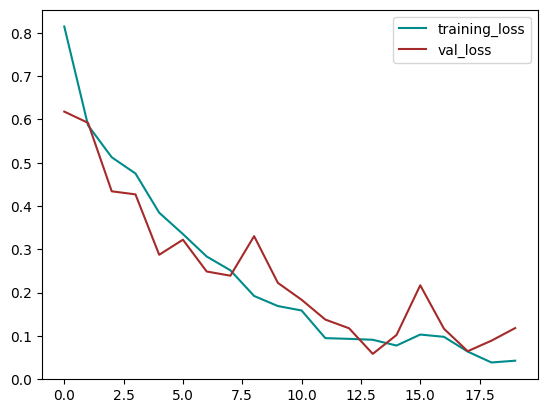

In [48]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='darkcyan',label='training_loss')
plt.plot(hist.history['val_loss'],color='brown',label='val_loss')
plt.legend()
plt.show()

###Evaluation

In [49]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [50]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [51]:
for batch in test.as_numpy_iterator():
  X,y=batch
  yhat=model.predict(X)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


In [52]:
print(f"Precision:{pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}")

Precision:1.0,Recall:1.0,Accuracy:1.0


##Testing

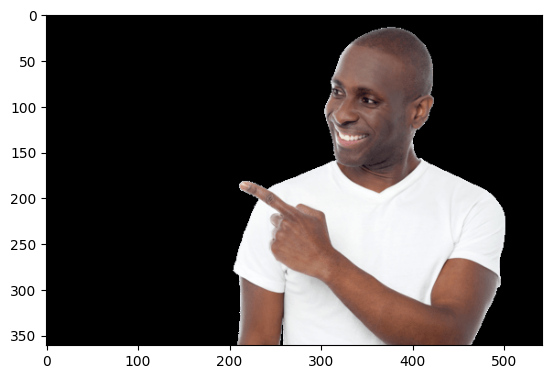

In [54]:
img=cv2.imread('/content/happy man.png')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

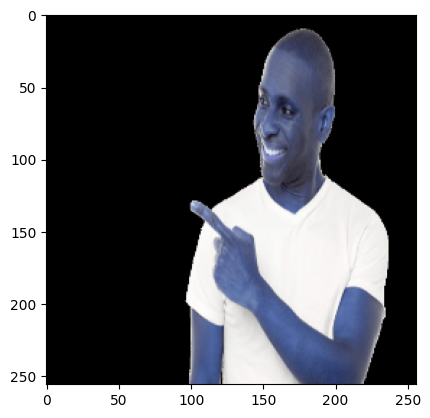

In [55]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [56]:
scale=resize/255.0

In [57]:
#prediction
y_hat=model.predict(np.expand_dims(scale,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 823ms/step


In [59]:
if y_hat>0.5:
  print('happy')
else:
  print('sad')

happy


In [60]:
import pickle

In [62]:
model.save('image_classifier.keras')